In [2]:
#v4: 20240607 Ne plot: LAT vs. HT
#v3: added visualization of the grid, plus coloring B-field strength
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
#
def read_hdf5_file(fpath, vname0, vname):
    with h5py.File(fpath, 'r') as file:
        # access datasets and attributes in the file
        #print('vname0=',vname0)
        print('vname=',vname)
        dataset = file[vname0][vname]  
        data = dataset[:]  # retrieves the data as a NumPy array
    return data

# path to HDF5 file
path = '/Users/nmaruyama/OneDrive - UCB-O365/project/gdc_aether/Trevor/'
print('path=', path)
fpath = path + 'IPE_Grid.h5'
print('fpath=',fpath)



# array dimensions
# number of grid points in magnetic longitude in the IPE model
nmp = 80
# number of magnetic flux tubes in the IPE model from the north pole.
nlp = 170
# number of grid points along a magnetic flux tube in the IPE model from the northern hemisphere at 90km.
iDIM = 1115
# 1:geographic eastward; 2:northward; 3:upward
napex = 3
apex_d1 = np.zeros((nmp,nlp,iDIM,napex))
apex_d2 = np.zeros((nmp,nlp,iDIM,napex))
apex_d3 = np.zeros((nmp,nlp,iDIM,napex))
m2km = 1.0e-3
rad2deg = 180./math.pi


#index for test output
mp1 = 0  # american longitude sector ~280E deg glong
mp2 = 40 # 100E deg glong
lp = 40  # ID of the magnetic field lines counting from northern pole
i1 = 0   # 90km at i=0
i2 = 2  


# (0) altitude[meter]
vname0 = 'apex_grid'
vname = 'altitude'
#print('0vname=',vname)
alt = read_hdf5_file(fpath, vname0, vname)
print(vname + '=',alt[lp,i1:i2]*m2km, '[km]')

# (1) geographic longitude [radian]
vname = 'longitude'
#print('1vname=',vname)
glon = read_hdf5_file(fpath, vname0, vname)
print(glon[mp1,lp,i1:i2]*rad2deg,'[deg]')
#print(vname + '=',glon[mp2,lp,i1:i2]*rad2deg,'[deg]')

# (2) geographic colatitude [radian]
vname = 'colatitude'
#print('2vname=',vname)
gcolat = read_hdf5_file(fpath, vname0, vname)
print(90. - gcolat[mp1,lp,i1:i2]*rad2deg,'[deg]')
#print(vname + '=',90. - gcolat[mp2,lp,i1:i2]*rad2deg,'[deg]')


# (3) total magnetic field strength [Tesla]
vname = 'magnetic_field_strength'
#print('3vname=',vname)
B_strength = read_hdf5_file(fpath, vname0, vname)
print(B_strength[mp1,lp,i1:i2],'[Tesla]')
#print(vname + '=',B_strength[mp2,lp,i1:i2],'[Tesla]')


# (4) magnetic field base vectors at each grid point of the IPE model: 
# d1, d2, d3
# as shown in (eq3.8--10)
# A.D. Richmond, J. Geomag. Geoelectr. 47, p191, 1995 https://doi.org/10.5636/jgg.47.191
#(4.1) d1: positive magnetic eastward component of the magnetic field
#(4.1.1) d1[1]: 1:geographic east component 
vname = 'apex_d_11'
#print('4.1.1vname=',vname)
d11 = read_hdf5_file(fpath, vname0, vname)
print(d11[mp1,lp,i1:i2])
#print(vname + '=',d11[mp2,lp,i1:i2])

#(4.1.2) d1[2]: 2:geographic north component
vname = 'apex_d_12'
#print('4.1.2vname=',vname)
d12 = read_hdf5_file(fpath, vname0, vname)
print(d12[mp1,lp,i1:i2])
#print(vname + '=',d12[mp2,lp,i1:i2])

#(4.1.3) d1[3]: 3:geographic upward component
vname = 'apex_d_13'
#print('4.1.3vname=',vname)
d13 = read_hdf5_file(fpath, vname0, vname)
print(d13[mp1,lp,i1:i2])
#print(vname + '=',d13[mp2,lp,i1:i2])

# transferring into a bigger array, apex_d1:
apex_d1[:,:,:,0] = d11[:,:,:] #east
apex_d1[:,:,:,1] = d12[:,:,:] #north
apex_d1[:,:,:,2] = d13[:,:,:] #up


#(4.2) d2: positive magnetic equator/downward component of the magnetic field
#(4.2.1) d2[1]: 1:geographic east component 
vname = 'apex_d_21'
#print('4.2.1vname=',vname)
d21 = read_hdf5_file(fpath, vname0, vname)
print(d21[mp1,lp,i1:i2])
#print(vname + '=',d21[mp2,lp,i1:i2])

#4.2.2. d2[2]: 2:geographic north component
vname = 'apex_d_22'
#print('4.2.2vname=',vname)
d22 = read_hdf5_file(fpath, vname0, vname)
print(d22[mp1,lp,i1:i2])
#print(vname + '=',d22[mp2,lp,i1:i2])

#4.2.3. d2[3]: 3:geographic up component
vname = 'apex_d_23'
#print('4.3.2vname=',vname)
d23 = read_hdf5_file(fpath, vname0, vname)
print(d23[mp1,lp,i1:i2])
#print(vname + '=',d23[mp2,lp,i1:i2])

# transferring into a bigger array, apex_d2:
apex_d2[:,:,:,0] = d21[:,:,:] #east
apex_d2[:,:,:,1] = d22[:,:,:] #north
apex_d2[:,:,:,2] = d23[:,:,:] #up


#(4.3) d3: positive parallel component of the magnetic field
#(4.3.1) d3[1]: 1:geographic east component 
vname = 'apex_d_31'
#print('4.3.1vname=',vname)
d31 = read_hdf5_file(fpath, vname0, vname)
#print(d31[mp1,lp,i1:i2])
#print(vname + '=',d31[mp2,lp,i1:i2])

#(4.3.2) d3[2]: 2:geographic north component
vname = 'apex_d_32'
#print('4.3.2vname=',vname)
d32 = read_hdf5_file(fpath, vname0, vname)
#print(d32[mp1,lp,i1:i2])
#print(vname + '=',d32[mp2,lp,i1:i2])

#(4.3.3) d3[3]: 3:geographic up component
vname = 'apex_d_33'
#print('4.3.3vname=',vname)
d33 = read_hdf5_file(fpath, vname0, vname)
#print(d33[mp1,lp,i1:i2])
#print(vname + '=',d33[mp2,lp,i1:i2])

# transferring into a bigger array, apex_d3:
apex_d3[:,:,:,0] = d31[:,:,:] #east
apex_d3[:,:,:,1] = d32[:,:,:] #north
apex_d3[:,:,:,2] = d33[:,:,:] #up

###
print('reading grid finished')




path= /Users/nmaruyama/OneDrive - UCB-O365/project/gdc_aether/Trevor/
fpath= /Users/nmaruyama/OneDrive - UCB-O365/project/gdc_aether/Trevor/IPE_Grid.h5


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/nmaruyama/OneDrive - UCB-O365/project/gdc_aether/Trevor/IPE_Grid.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
nMax = 2
VarApex = np.zeros((nlp,iDIM,nMax))
x       = np.zeros((nlp))
vname = ['altitude','m_colat']
#iswmf = 10 #110km SWMF potential solver
iswmf = 0 #90km IPE dynamo solver
vname0 = 'apex_grid'


for i in range(nMax):
    print('i=',i)
    print(i,'vname=',vname[i])
    VarApex[:,:,i] = read_hdf5_file(fpath, vname0, vname[i])

    
print(vname[0] + '=',VarApex[lp,iswmf,0]*m2km, '[km]')
print(0,vname[1] + '=',(90.-VarApex[0,0,1]*rad2deg), '[deg]')



for j in range(nlp):
    x[j] = 90. - VarApex[j,iswmf,1]*rad2deg
    print((j+1),"{:.3f}".format(x[j]))



# X is an array 
c = np.savetxt('mlat_ipe_deg.txt', x, fmt='%.3f', delimiter =', ')    



i= 0
0 vname= altitude
vname= altitude
i= 1
1 vname= m_colat
vname= m_colat
altitude= 90.0 [km]
0 m_colat= 88.12383262580553 [deg]
1 88.124
2 87.626
3 86.239
4 85.568
5 84.334
6 83.577
7 82.401
8 81.584
9 80.430
10 79.563
11 78.409
12 77.498
13 76.332
14 75.376
15 74.188
16 73.187
17 71.969
18 70.922
19 69.668
20 68.573
21 67.279
22 66.135
23 64.798
24 63.603
25 62.221
26 60.977
27 59.548
28 58.257
29 56.783
30 55.447
31 53.932
32 52.555
33 51.004
34 49.594
35 48.014
36 46.578
37 44.977
38 43.526
39 41.916
40 40.461
41 38.854
42 37.407
43 35.816
44 34.390
45 32.828
46 31.436
47 29.916
48 29.655
49 29.390
50 29.121
51 28.848
52 28.570
53 28.287
54 27.999
55 27.706
56 27.408
57 27.104
58 26.854
59 26.600
60 26.342
61 26.080
62 25.814
63 25.544
64 25.269
65 24.989
66 24.704
67 24.414
68 24.176
69 23.936
70 23.691
71 23.443
72 23.190
73 22.934
74 22.673
75 22.408
76 22.139
77 21.865
78 21.641
79 21.415
80 21.185
81 20.952
82 20.715
83 20.475
84 20.230
85 19.981
86 19.729
87 19.471
88 19.26

In [25]:
#20240225v4: added Ne
# path to HDF5 file
path1 = '/Users/nmaruyama/OneDrive - UCB-O365/students/Bradley/JupyterNotebook/GLOW/'
print('path1=', path1)
fpath1 = path1 + 'IPE_State.apex.202004200000.h5'
print('fpath1=',fpath1)

# (0) O+ density[m-3]
vname0 = 'apex'
print('vname0=',vname0)
vname = 'o_plus_density'
print('vname=',vname)
oplus = read_hdf5_file(fpath1, vname0, vname)
mp=0
lp=30
i1=0
i2=1
print(vname + '=',oplus[mp,lp,i1:i2], '[m-3]')
vname = 'h_plus_density'
hplus = read_hdf5_file(fpath1, vname0, vname)
vname = 'he_plus_density'
heplus = read_hdf5_file(fpath1, vname0, vname)
vname = 'n_plus_density'
nplus = read_hdf5_file(fpath1, vname0, vname)
vname = 'no_plus_density'
noplus = read_hdf5_file(fpath1, vname0, vname)
vname = 'n2_plus_density'
n2plus = read_hdf5_file(fpath1, vname0, vname)
vname = 'o2_plus_density'
o2plus = read_hdf5_file(fpath1, vname0, vname)
vname = 'o_plus_2D_density'
oplus2d = read_hdf5_file(fpath1, vname0, vname)
vname = 'o_plus_2P_density'
oplus2p = read_hdf5_file(fpath1, vname0, vname)

el_den = np.zeros((nmp,nlp,iDIM))
el_den[:,:,:] = oplus[:,:,:] + hplus[:,:,:] + heplus[:,:,:] + nplus[:,:,:] + noplus[:,:,:]  + n2plus[:,:,:]  + o2plus[:,:,:] + oplus2d[:,:,:] + oplus2p[:,:,:]

path1= /Users/nmaruyama/OneDrive - UCB-O365/students/Bradley/JupyterNotebook/GLOW/
fpath1= /Users/nmaruyama/OneDrive - UCB-O365/students/Bradley/JupyterNotebook/GLOW/IPE_State.apex.202004200000.h5
vname0= apex
vname= o_plus_density
vname0= apex
vname= o_plus_density
o_plus_density= [28.04173816] [m-3]
vname0= apex
vname= h_plus_density
vname0= apex
vname= he_plus_density
vname0= apex
vname= n_plus_density
vname0= apex
vname= no_plus_density
vname0= apex
vname= n2_plus_density
vname0= apex
vname= o2_plus_density
vname0= apex
vname= o_plus_2D_density
vname0= apex
vname= o_plus_2P_density


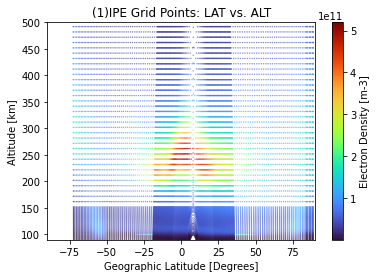

<Figure size 432x288 with 0 Axes>

In [28]:
# 20240220v2:visualize model grid points
# v3: added visualization of the grid, plus coloring B-field strength

# (plot1)
# x-axis: geographic latitude [deg]
# y-axis: altitude [km]
# color: magnetic field strength [tesla]

# array initialization
x_data = np.zeros((nlp,iDIM))
y_data = np.zeros((nlp,iDIM))
color_data = np.zeros((nlp,iDIM)) #color data

# assign values
mp3 = 40
x_data = 90. - gcolat[mp3,:,:]*rad2deg
y_data = alt*m2km
#color_data = B_strength[mp3,:,:] #magnetic field strength[tesla]
color_data = el_den[mp3,:,:] #magnetic field strength[tesla]


# Create a scatter plot
scatter = plt.scatter(x_data, y_data,c=color_data, cmap='turbo', s=0.1, alpha=1.) # Adjust size (s) and transparency (alpha) as needed


# Add a colorbar to show the mapping of colors to values
#plt.colorbar(scatter, label='Magnetic field strength [Tesla]')
plt.colorbar(scatter, label='Electron Density [m-3]')


# Add labels and title
plt.xlabel('Geographic Latitude [Degrees]')
plt.ylabel('Altitude [km]')
plt.title('(1)IPE Grid Points: LAT vs. ALT')

plt.xlim(-90,+90) # sets latitude limits
plt.ylim(+90,+500)# sets altitude limits


# Show the plot
plt.show()


vname= tube_max
[1115 1115 1115 1115 1115 1115 1115  979  843  769]
check alt[km] NH: 352.0
check alt[km] SH: 352.0


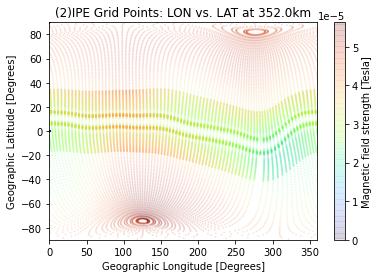

In [17]:
# 20240220v2:visualize model grid points
# (plot2)
# y-axis: geographic Latitude [deg]
# x-axis: geographic Longitude [deg]
# color: magnetic field strength [tesla]


# tube max : JMAX: number of grid points for each flux tube [lp]
vname = 'tube_max'
#print('vname=',vname)
JMAX = read_hdf5_file(fpath, vname)
print(JMAX[0:10])


lp3 = 0 #pick a flux tube
i3  = 51 #index at 352km in Northern Hemisphere
ii3 = JMAX[lp3] - i3 -1 # index at 352km in Southern Hemisphere
print('check alt[km] NH:',alt[lp3,i3]*m2km)
print('check alt[km] SH:',alt[lp3,ii3]*m2km)


# array initialization for plotting
nlp2 = nlp * 2
x_data = np.zeros((nmp,nlp2))
y_data = np.zeros((nmp,nlp2))
color_data = np.zeros((nmp,nlp2))

# assign values: NH
x_data[:,0:nlp-1] =         glon[:,0:nlp-1,i3]*rad2deg #glon
y_data[:,0:nlp-1] = 90. - gcolat[:,0:nlp-1,i3]*rad2deg #glat
color_data[:,0:nlp-1] = B_strength[:,0:nlp-1,i3] #magnetic field strength[tesla]

# assign values: SH
for m in range(0, nmp-1):
    for l in range(0, nlp-1):
        ii3 = JMAX[l] - i3 -1
        ll = nlp2 - l -1
        x_data[m,ll] =         glon[m,l,ii3]*rad2deg
        y_data[m,ll] = 90. - gcolat[m,l,ii3]*rad2deg
        color_data[m,ll] = B_strength[m,l,ii3]


# Create a scatter plot
scatter = plt.scatter(x_data, y_data,c=color_data, cmap='turbo', s=1, alpha=0.1) # Adjust size (s) and transparency (alpha) as needed

# Add a colorbar to show the mapping of colors to values
plt.colorbar(scatter, label='Magnetic field strength [Tesla]')

# Add labels and title
plt.xlabel('Geographic Longitude [Degrees]')
plt.ylabel('Geographic Latitude [Degrees]')
plt.title('(2)IPE Grid Points: LON vs. LAT at ' + str(alt[lp3,i3]*m2km) + 'km')

plt.xlim(  0,+360) # sets longitude limits
plt.ylim(-90, +90)# sets latitude limits


# Show the plot
plt.show()